In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Read the data

df = pd.read_csv("cleaned.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412875 entries, 0 to 3412874
Data columns (total 16 columns):
 #   Column                Dtype  
---  ------                -----  
 0   station_id            int64  
 1   Net_Flow              int64  
 2   hour                  int64  
 3   is_holiday            bool   
 4   feels_like            float64
 5   weather_Clear         int64  
 6   weather_Clouds        int64  
 7   weather_Drizzle       int64  
 8   weather_Fog           int64  
 9   weather_Haze          int64  
 10  weather_Mist          int64  
 11  weather_Rain          int64  
 12  weather_Smoke         int64  
 13  weather_Snow          int64  
 14  weather_Thunderstorm  int64  
 15  day_of_week           int64  
dtypes: bool(1), float64(1), int64(14)
memory usage: 393.8 MB
None


In [4]:
# Transforming

df = pd.get_dummies(df, columns=['hour', 'day_of_week', 'station_id'])

feels_like_data = df['feels_like'].values
feels_like_data = feels_like_data.reshape(-1, 1)
scaler = StandardScaler()
scaled_feels_like_data = scaler.fit_transform(feels_like_data)
df = df.astype(int)
df['feels_like'] = scaled_feels_like_data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412875 entries, 0 to 3412874
Columns: 510 entries, Net_Flow to station_id_594
dtypes: float64(1), int32(509)
memory usage: 6.5 GB


In [6]:
# Train and Test split

y = df['Net_Flow']
X = df.drop('Net_Flow', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
# Linear Regression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 7.222800184081564


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)

print("Predictions:", y_pred)

Epoch 1/10
76790/76790 [==============================] - 83s 1ms/step - loss: -350537.2188 - accuracy: 0.1579 - val_loss: -1356713.7500 - val_accuracy: 0.1610
Epoch 2/10
76790/76790 [==============================] - 81s 1ms/step - loss: -5206123.5000 - accuracy: 0.1599 - val_loss: -10752121.0000 - val_accuracy: 0.1592
Epoch 3/10
76790/76790 [==============================] - 82s 1ms/step - loss: -22295810.0000 - accuracy: 0.1597 - val_loss: -35922800.0000 - val_accuracy: 0.1596
Epoch 4/10
76790/76790 [==============================] - 82s 1ms/step - loss: -59505408.0000 - accuracy: 0.1599 - val_loss: -84530872.0000 - val_accuracy: 0.1604
Epoch 5/10
76790/76790 [==============================] - 82s 1ms/step - loss: -125140528.0000 - accuracy: 0.1600 - val_loss: -164935360.0000 - val_accuracy: 0.1603
Epoch 6/10
76790/76790 [==============================] - 82s 1ms/step - loss: -227080512.0000 - accuracy: 0.1602 - val_loss: -284377888.0000 - val_accuracy: 0.1605
Epoch 7/10
76790/76790

In [10]:
y_pred = model.predict(X_test)

21331/21331 [==============================] - 14s 655us/step


In [12]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 7.2520616782038605


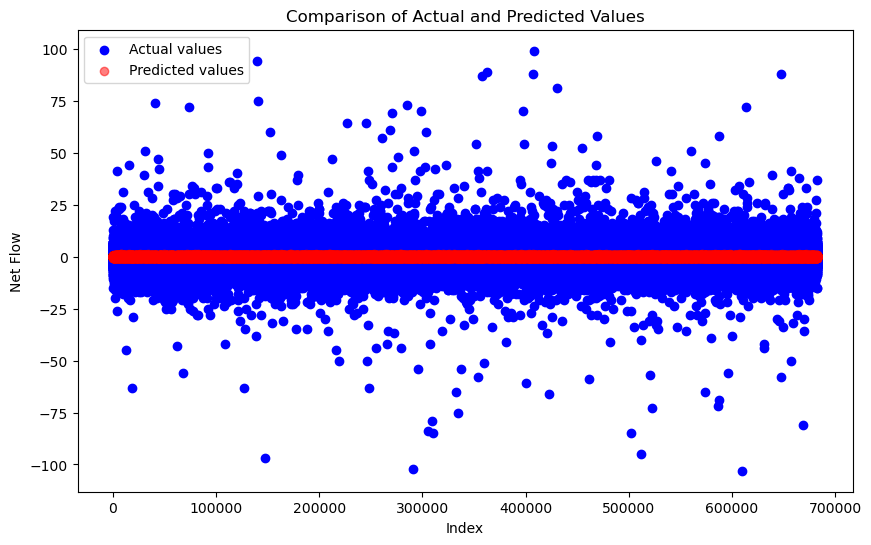

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual values')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted values', alpha=0.5)
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Net Flow')
plt.legend()
plt.show()